### Q-5. Uber is a taxi service provider as we know, we need to predict the high
booking area using an Unsupervised algorithm and price for the location using a
supervised algorithm and use some map function to display the data
Dataset This is the Dataset You can use this dataset for this question.

In [4]:
!pip install kaggle
from google.colab import files
files.upload() # upload the kaggle.json file (api token)

#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json
# !your dataset api command
!kaggle datasets download -d brllrb/uber-and-lyft-dataset-boston-ma

from zipfile import ZipFile
file_name = 'uber-and-lyft-dataset-boston-ma.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json
 85% 38.0M/44.5M [00:00<00:00, 78.0MB/s]
100% 44.5M/44.5M [00:00<00:00, 77.3MB/s]
Done


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [6]:
df= pd.read_csv("/content/rideshare_kaggle.csv")
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.0,1.544046e+09,689192.492586,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,693071.0,1.161914e+01,6.948114,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,693071.0,1.779436e+01,9.982286,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,693071.0,1.158668e+01,0.492429,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,693071.0,2.189430e+00,1.138937,2.000000e-02,1.280000e+00,2.160000e+00,2.920000e+00,7.860000e+00
surge_multiplier,693071.0,1.013870e+00,0.091641,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,693071.0,4.233817e+01,0.047840,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,693071.0,-7.106615e+01,0.020302,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,693071.0,3.958439e+01,6.726084,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


In [9]:
df['datetime']=pd.to_datetime(df['datetime'])

### Data Cleaning

In [10]:
df.isnull().sum().sum()

55095

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df.isnull().sum().sum()

0

In [13]:
df = df.drop(['visibility.1'],axis=1)

### Source and Destination Analysis

In [14]:
df.groupby(by=["destination","source"]).agg({'latitude':'mean','longitude':'mean'})

latitude  longitude
destination             source                                       
Back Bay                Boston University        42.336960 -71.066178
                        Fenway                   42.337740 -71.065822
                        Haymarket Square         42.337087 -71.065110
                        North End                42.338100 -71.066343
                        Northeastern University  42.336668 -71.065314
                        South Station            42.338897 -71.065908
Beacon Hill             Boston University        42.336917 -71.065885
                        Fenway                   42.338990 -71.065719
                        Haymarket Square         42.337413 -71.066059
                        North End                42.338418 -71.065809
                        Northeastern University  42.337268 -71.066061
                        South Station            42.336316 -71.065699
Boston University       Back Bay                 42.337217 -71.065947
                        Beacon Hill              42.339364 -71.066517
                        Financial District       42.339361 -71.066465
                        North Station            42.338372 -71.066191
                        Theatre District         42.338152 -71.066276
                        West End                 42.337556 -71.066265
Fenway                  Back Bay                 42.340103 -71.065819
                        Beacon Hill              42.337595 -71.065471
                        Financial District       42.337147 -71.066254
                        North Station            42.339660 -71.066504
                        Theatre District         42.336378 -71.065388
                        West End                 42.338521 -71.066339
Financial District      Boston University        42.338733 -71.066581
                        Fenway                   42.337034 -71.066028
                        Haymarket Square         42.337781 -71.065863
                        North End                42.338338 -71.065965
                        Northeastern University  42.338523 -71.065964
                        South Station            42.338989 -71.067037
Haymarket Square        Back Bay                 42.339877 -71.066475
                        Beacon Hill              42.337246 -71.065966
                        Financial District       42.337398 -71.066237
                        North Station            42.338276 -71.066073
                        Theatre District         42.338175 -71.065699
                        West End                 42.339109 -71.066251
North End               Back Bay                 42.338516 -71.066170
                        Beacon Hill              42.336792 -71.066216
                        Financial District       42.337654 -71.066158
                        North Station            42.339309 -71.066936
                        Theatre District         42.338578 -71.066639
                        West End                 42.338614 -71.065878
North Station           Boston University        42.338786 -71.066362
                        Fenway                   42.338450 -71.066614
                        Haymarket Square         42.337260 -71.066279
                        North End                42.337672 -71.065832
                        Northeastern University  42.337793 -71.066491
                        South Station            42.336529 -71.065432
Northeastern University Back Bay                 42.338917 -71.066289
                        Beacon Hill              42.339002 -71.065600
                        Financial District       42.337789 -71.066015
                        North Station            42.339770 -71.066493
                        Theatre District         42.338356 -71.065319
                        West End                 42.336812 -71.066274
South Station           Back Bay                 42.338567 -71.065891
                        Beacon Hill              42.338714 -

geospatial map: departure point of the trips is haymarket square. Plot using clusters

In [ ]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp

!pip install --upgrade shapely

!pip install --upgrade descartes

In [17]:
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster
df1 = df[df['source']=='Haymarket Square']
my_map = folium.Map(location=[df1["latitude"].mean(), df1["longitude"].mean()],zoom_start = 10)
my_map.add_child(FastMarkerCluster(df1[['latitude', 'longitude']].values.tolist(),color='green'))
my_map

trips which their sources are Haymarket Square have two groups or clusters of destination that contain many places (see them by zooming)

### Price Analysis

In [18]:
pd.set_option('display.max_rows', 72)
df.groupby(by=["source","destination"]).price.agg(["mean"])

mean
source                  destination                       
Back Bay                Boston University        14.039392
                        Fenway                   13.658752
                        Haymarket Square         17.987384
                        North End                19.473019
                        Northeastern University  13.151040
                        South Station            17.700711
Beacon Hill             Boston University        16.376737
                        Fenway                   16.158840
                        Haymarket Square         13.799137
                        North End                15.270942
                        Northeastern University  16.471792
                        South Station            15.950661
Boston University       Back Bay                 13.992801
                        Beacon Hill              17.315535
                        Financial District       24.146085
                        North Station            20.185338
                        Theatre District         18.689557
                        West End                 18.611766
Fenway                  Back Bay                 13.802155
                        Beacon Hill              16.796674
                        Financial District       23.438818
                        North Station            19.701839
                        Theatre District         18.232722
                        West End                 18.161806
Financial District      Boston University        25.498434
                        Fenway                   23.404850
                        Haymarket Square         13.188209
                        North End                13.179635
                        Northeastern University  21.918584
                        South Station            12.349066
Haymarket Square        Back Bay                 16.860489
                        Beacon Hill              13.338559
                        Financial District       12.731618
                        North Station            12.332545
                        Theatre District         13.677272
                        West End                 12.529855
North End               Back Bay                 19.550935
                        Beacon Hill              15.982630
                        Financial District       13.417597
                        North Station            12.824092
                        Theatre District         15.169406
                        West End                 13.494873
North Station           Boston University        18.931558
                        Fenway                   18.547603
                        Haymarket Square         12.571791
                        North End                13.106641
                        Northeastern University  19.537848
                        South Station            15.374198
Northeastern University Back Bay                 13.698923
                        Beacon Hill              16.842433
                        Financial District       22.582094
                        North Station            19.910939
                        Theatre District         16.144805
                        West End                 18.204155
South Station           Back Bay                 19.103822
                        Beacon Hill              17.276304
                        Financial District       12.436910
                        North Station            15.746736
                        Theatre District         13.952579
                        West End                 15.881172
Theatre District        Boston University        20.360662
                        Fenway                   19.069278
                        Haymarket Square         15.204973
                        North End                15.159646
                        Northeastern University  16.910751
                        South Station            12.888926
West End                Boston University 

In [19]:
print('Maximum price in our data :',df.price.max())
df[df['price']==df.price.max()]
# this is an outlier

Maximum price in our data : 97.5


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
597071,ba1593a1-e4fd-4c7a-a011-e2d4fccbf081,1.543714e+09,1,2,12,2018-12-02 01:28:02,America/New_York,Financial District,Fenway,Lyft,lyft_luxsuv,Lux Black XL,97.5,4.43,2.0,42.3503,-71.081,35.52,35.52,Clear,Light rain in the morning and overnight.,0.0,0.0,0.82,1.85,2.37,1543672800,9.846,44.65,1543690800,34.88,1543712400,43.98,1543690800,35.53,1543712400,clear-night,30.46,1023.52,146,0.12,0,274.6,1543665335,1543698860,0.82,0.0,1543683600,31.57,1543665600,44.65,1543690800,28.1,1543658400,43.98,1543690800


In [20]:
df[df['price']==df.price.max()][['latitude','longitude']]

,latitude,longitude
597071,42.3503,-71.081


In [21]:
map1 = folium.Map(location=(42.3503,-71.081),zoom_start = 10)
folium.Marker(location=(42.3503,-71.081)).add_to(map1) # Fenway
folium.Marker(location=(42.3378,-71.066)).add_to(map1) # Financial District
display(map1)

In [22]:
df_group = df.groupby(by=["source","destination"]).price.agg(["mean"]).reset_index()
df_group[(df_group['source']=='Financial District')& (df_group['destination']=='Fenway')]

,source,destination,mean
25,Financial District,Fenway,23.40485


In [23]:
df = df.loc[df['price']!=df.price.max()]
# dropping the outlier

### Removing Unnecessary Features

In [24]:
new_df = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'],axis=1)

In [25]:
new_df.shape

(637975, 41)

In [26]:
new_df = new_df.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax'],axis=1)
new_df.shape
# dropping temperature related features

(637975, 30)

In [27]:
new_df = new_df.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)
new_df.shape
#dropping climeate related features

(637975, 16)

In [28]:
category_col = new_df.select_dtypes(include=['object','category']).columns.tolist()
for column in new_df[category_col]:
    print(f'{column} : {new_df[column].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Clou

 'timezone' feature has only 1 value and 'product_id' feature contains many unidentified values. We drop them

In [29]:
new_df = new_df.drop(['timezone','product_id'],axis=1)

In [30]:
new_df.shape

(637975, 14)

Next: encoding categorical features

In [31]:
new_cat = ['source',
 'destination',
 'cab_type',
 'name',
 'short_summary',
 'icon','price']

df_cat = new_df[new_cat]
df_cat.head()

,source,destination,cab_type,name,short_summary,icon,price
0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,partly-cloudy-night,5.0
1,Haymarket Square,North Station,Lyft,Lux,Rain,rain,11.0
2,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night,7.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,clear-night,26.0
4,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,partly-cloudy-night,9.0


In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [33]:
df_cat_encode

,source,destination,cab_type,name,short_summary,icon,price
0,5,7,0,7,4,5,5.0
1,5,7,0,2,8,6,11.0
2,5,7,0,5,0,1,7.0
3,5,7,0,4,0,1,26.0
4,5,7,0,6,6,5,9.0
...,...,...,...,...,...,...,...
693065,11,6,1,11,6,5,9.5
693066,11,6,1,10,6,5,13.0
693067,11,6,1,9,6,5,9.5
693069,11,6,1,1,6,5,27.0


<Axes: >

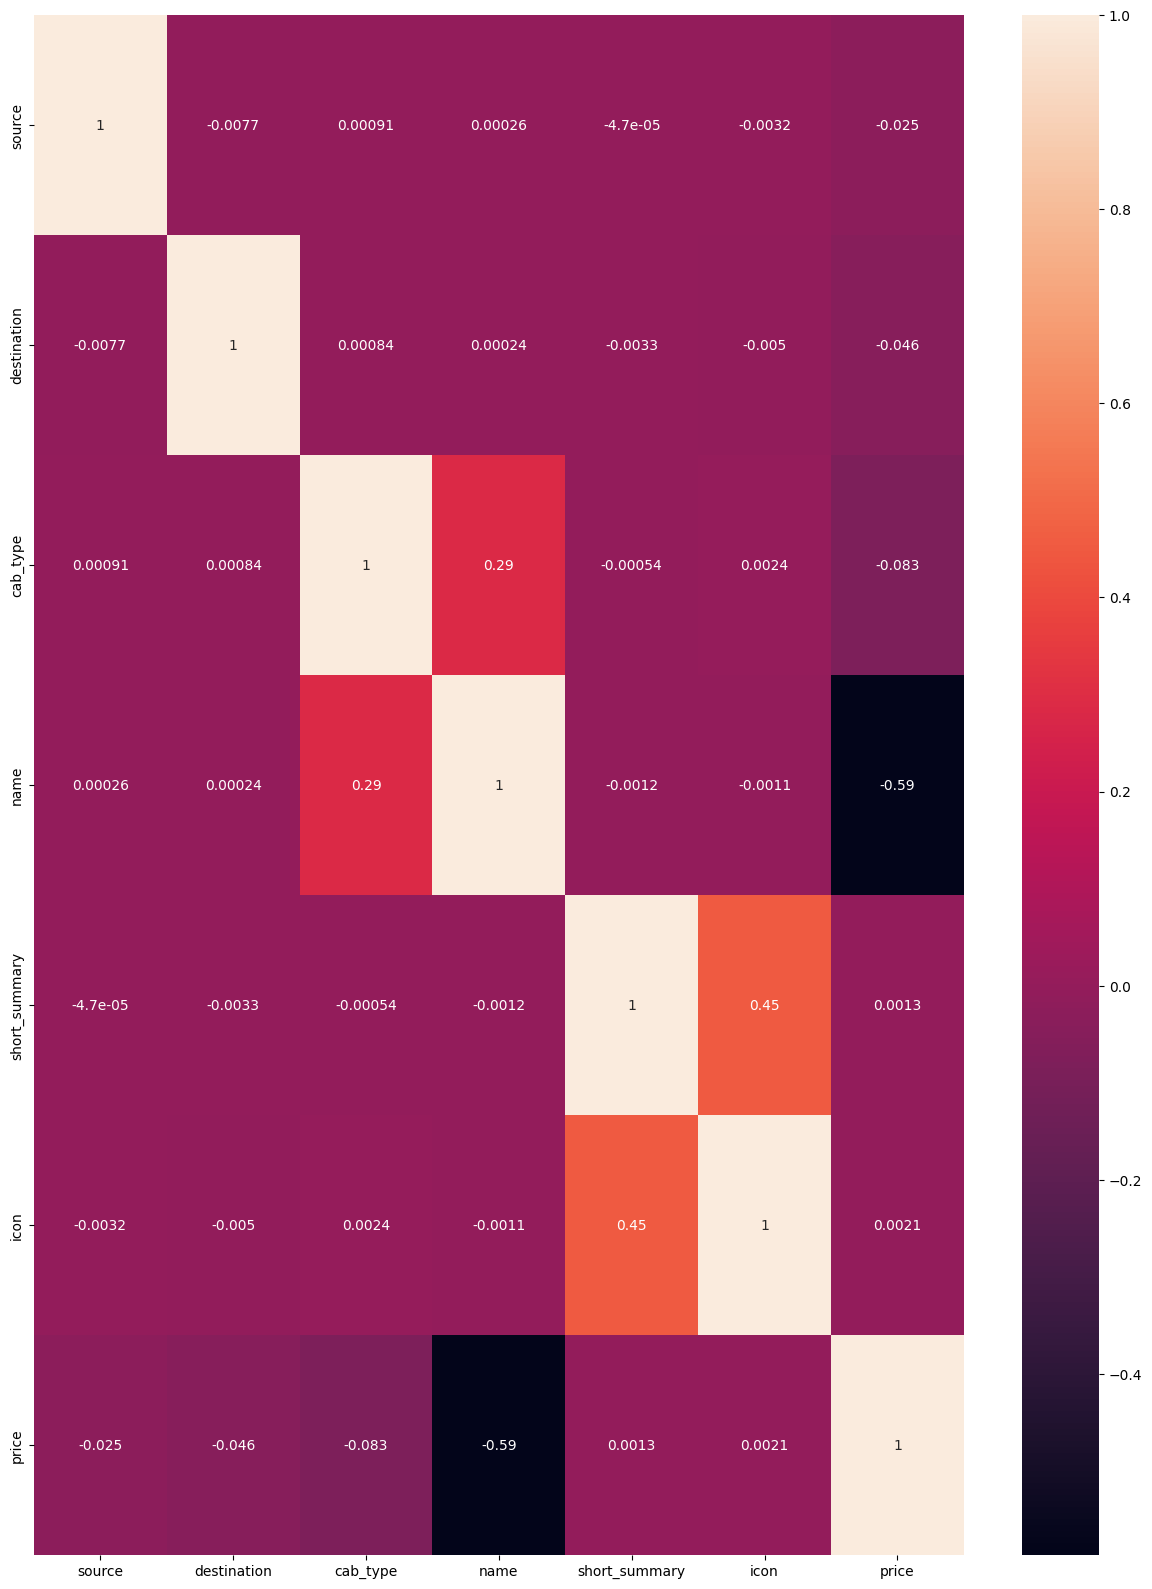

In [34]:
plt.figure(figsize=(15,20))
sns.heatmap(df_cat_encode.corr(),annot=True)

name feature that has a relatively strong correlation.
pick cab_type feature because it has stronger correlation

In [35]:
new_df = new_df.drop(['source','destination','short_summary','icon'],axis=1)
new_df.head()

,hour,day,month,cab_type,name,price,distance,surge_multiplier,latitude,longitude
0,9,16,12,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033
1,2,27,11,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033
2,1,28,11,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033
3,4,30,11,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033
4,3,29,11,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.033


In [36]:
new_df = new_df.drop(['hour','day','month','latitude','longitude'],axis=1) # won't need them for now
new_df.head()

,cab_type,name,price,distance,surge_multiplier
0,Lyft,Shared,5.0,0.44,1.0
1,Lyft,Lux,11.0,0.44,1.0
2,Lyft,Lyft,7.0,0.44,1.0
3,Lyft,Lux Black XL,26.0,0.44,1.0
4,Lyft,Lyft XL,9.0,0.44,1.0


IQR method for checking top and bottom outliers

In [37]:
Qp12 = new_df['price'].quantile(0.25)
Qp32 = new_df['price'].quantile(0.75)
IQRp = Qp32-Qp12

In [38]:
new_df[new_df['price']>(Qp32+(1.5*IQRp))]

,cab_type,name,price,distance,surge_multiplier
706,Lyft,Lux Black,52.5,3.25,2.00
707,Lyft,Lux Black XL,67.5,3.25,2.00
769,Lyft,Lux Black XL,45.5,4.76,1.00
1094,Lyft,Lux Black XL,45.5,4.31,1.00
1318,Lyft,Lux Black XL,45.5,5.33,1.00
...,...,...,...,...,...
692439,Uber,Black SUV,47.0,5.56,1.00
692698,Lyft,Lux Black XL,52.5,4.58,1.25
692891,Lyft,Lux Black XL,47.5,5.42,1.00
692962,Uber,Black SUV,51.0,7.36,1.00


5588 data outliers. Need to drop them

In [39]:
new_df[new_df['price']<(Qp12-(1.5*IQRp))]

,cab_type,name,price,distance,surge_multiplier


In [40]:
print('Size before removing :',new_df.shape)
new_df= new_df[~((new_df['price']>(Qp32+(1.5*IQRp))))]
print('Size after removing :',new_df.shape)

Size before removing : (637975, 5)
Size after removing : (632387, 5)


### Regression Model

One Hot Encoding

In [41]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [42]:
new_df_onehot=new_df.copy()
for col in new_df_onehot.select_dtypes(include='O').columns:
    new_df_onehot=one_hot_encoder(new_df_onehot,col)
    
new_df_onehot.head()

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [43]:
# train_test_split
from sklearn.model_selection import train_test_split
X = new_df_onehot.drop(columns=['price'],axis=1).values
y = new_df_onehot['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [45]:
# Fit to data training
model = reg.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9337789051792855

In [47]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

5.108383101703272
2.260173245948919


### Finding Best Models with best configuration with GridSearch CV

In [54]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
         'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

import warnings
warnings.filterwarnings('ignore')

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.933465,{'fit_intercept': False}
1,lasso,0.211560,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.964469,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
